In [1]:
#importing necessary libraries
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

c:\Users\arulk\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
train_data = datasets.FashionMNIST(root = "data",
                                  train = True,
                                  download=True,
                                   transform=ToTensor(),
                                   target_transform=None
                                   )
test_data = datasets.FashionMNIST(
  root = "data",
  train = False,
  download=True,
  transform=ToTensor(),
  target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[10]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0431,
           0.5569, 0.7843, 0.4157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.3333, 0.7255, 0.4392, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5961, 0.8392,
           0.8510, 0.7608, 0.9255, 0.8471, 0.7333, 0.5843, 0.5294, 0.6000,
           0.8275, 0.8510, 0.9059, 0.8039, 0.8510, 0.7373, 0.1333, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2588, 0.7255, 0.6510,
           0.7059, 0.7098, 0.7451, 0.8275, 0.8667, 0.7725, 0.5725, 0.7765,
           0.8078, 0.7490, 0.6588, 0.7451, 0.6745, 0.7373, 0.6863, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5294, 0.6000, 0.6275,
           0.6863, 0.7059, 0.6667, 0.7294, 0.7333, 0.7451, 0.7373, 0.7451,
           0.7333, 0.6824, 0.7647, 0.7255, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image.shape

torch.Size([1, 28, 28])

Image shape: torch.Size([1, 28, 28])


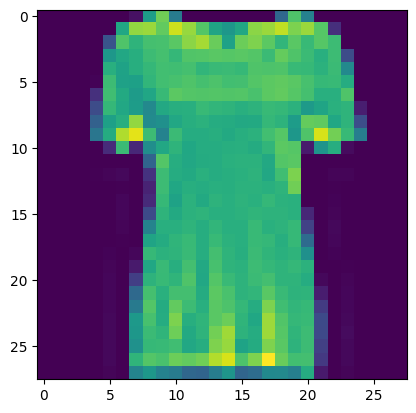

In [9]:
#visualizing the data
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

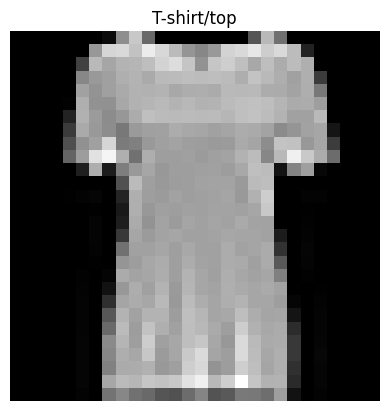

In [10]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [12]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset =train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

In [13]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x25a8ea1f3d0>,
 <torch.utils.data.dataloader.DataLoader at 0x25ae4bbbfa0>)

In [14]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [15]:
flatten_model  = nn.Flatten()
x = train_features_batch[0] 
output = flatten_model(x)
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [16]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape, out_features=hidden_units),
      nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [17]:
torch.manual_seed(42)
model_0  =FashionMNISTModelV0(
  input_shape=28*28,
  hidden_units=10,
  output_shape=len(class_names)

)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [19]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [20]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc= (correct/ len(y_pred)) * 100
  return acc

In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.1)

In [22]:
from timeit import default_timer as timer 
def print_train_time(start:float, end: float, device: torch.device = None):
  """prints difference start and end time"""
  total_time = end-start
  print(f"Train time is {total_time:.3f} seconds")

In [23]:
from tqdm.auto import tqdm
torch.manual_seed(42)
start_time = timer()
epochs = 10
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred  =model_0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch%400 ==0:
       print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
  train_loss /= len(train_dataloader )
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred = model_0(X)
      test_loss += loss_fn(test_pred, y)
      
      test_acc += accuracy_fn(y_true = y, y_pred  =test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")
end_time = timer()
total_train_time = print_train_time(start=start_time, end=end_time)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.5904 | Test Loss: 0.5095, Test Acc: 82.0387
Epoch: 1
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4763 | Test Loss: 0.4799, Test Acc: 83.1969
Epoch: 2
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4550 | Test Loss: 0.4766, Test Acc: 83.4265
Epoch: 3
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4425 | Test Loss: 0.4631, Test Acc: 83.7460
Epoch: 4
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
L

In [24]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,loss_fn: torch.nn.Module, accuracy_fn):
  '''returns a dictionary containing the results of model predicting on data loader'''
  loss, acc =0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      y_pred = model(X)
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc  /= len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
model_0_results = eval_model(model = model_0, data_loader = test_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46279823780059814,
 'model_acc': 83.64616613418531}

In [25]:
#model with non linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self, 
               input_shape:int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_shape),
      nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [26]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names))
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)

In [27]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [28]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
    train_loss, train_acc = 0, 0
    model.train()
    for batch, (X,y) in enumerate(data_loader):
      y_pred  =model(X)
      loss = loss_fn(y_pred, y)
      train_loss += loss
      train_acc += accuracy_fn(y_true = y, 
                               y_pred = y_pred.argmax(dim=1))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    train_loss /= len(data_loader )
    train_acc /= len(data_loader)
    print(f"Train Loss:{train_loss:.5f} | Train Acc: {train_acc:.5f}%")
  

In [29]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  model.eval()
  test_loss, test_acc = 0,0
  with torch.inference_mode():
    for X, y in data_loader:
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
        
      test_acc += accuracy_fn(y_true = y, y_pred  =test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
  print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}%")


In [30]:
torch.manual_seed(42)
train_time_start = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  train_step(
    model = model_1, data_loader=train_dataloader, loss_fn = loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn
  )
  test_step(model =model_1, data_loader= test_dataloader, loss_fn= loss_fn, accuracy_fn= accuracy_fn)
train_time_end = timer()
total_train_time = print_train_time(start = train_time_start, end = train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train Loss:1.09199 | Train Acc: 61.34333%
Test Loss: 0.9564, Test Acc: 64.9960%
Epoch: 1
Train Loss:0.78101 | Train Acc: 71.92833%
Test Loss: 0.7223, Test Acc: 73.9117%
Epoch: 2
Train Loss:0.67027 | Train Acc: 75.93667%
Test Loss: 0.6850, Test Acc: 75.0200%
Train time is 16.356 seconds


In [31]:
model_1_results = eval_model(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [32]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

### Building CNN

In [56]:
class FashionMNISTModelV2(nn.Module):
  '''Model architecture that replicates tinyVGG'''
  def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride = 1,
                padding = 1
                ),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                kernel_size =3,
                stride = 1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride = 1, padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride = 1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape)
    )
  def forward(self, x):
    x =self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x

In [57]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=len(class_names))

In [42]:
rand_img_tensor = torch.randn(size = (1,28,28))
rand_img_tensor.shape

torch.Size([1, 28, 28])

In [47]:
rand_img_tensor

tensor([[[-1.0744e-01,  2.1310e+00,  2.4406e-01,  1.0901e+00,  7.7187e-01,
           1.6738e-02,  6.8036e-01, -1.2983e-01, -5.7276e-01, -3.6839e-01,
          -1.6833e-01,  2.0470e+00, -2.0023e+00, -1.2304e+00,  8.7704e-01,
          -2.0921e+00, -5.6889e-01,  3.4890e-01, -1.1777e+00,  9.8450e-01,
           7.9244e-01, -3.0765e-01,  6.7602e-01,  2.6806e+00,  4.7541e-01,
           5.7430e-01,  1.9246e-01,  4.3041e-01],
         [ 5.3109e-01,  5.3204e-01, -1.5853e+00,  2.4220e+00,  3.9226e-01,
          -2.4747e-01, -2.6899e-01,  1.3260e-01,  4.7382e-01,  3.1056e-02,
          -1.4894e-01, -3.6520e-01, -9.6763e-01, -6.9899e-01, -9.2018e-02,
          -9.8115e-01,  1.0240e+00, -1.0366e+00, -1.9978e+00,  1.5088e+00,
           1.7852e-01,  2.8669e-01,  3.5793e-01, -1.0362e+00,  1.0007e+00,
           7.0487e-01, -6.9784e-01,  4.7286e-01],
         [ 1.1344e+00, -4.2129e-01,  3.0239e-02, -5.5710e-01, -8.8292e-01,
          -7.0626e-01, -1.2800e+00,  1.3593e-01, -1.2744e+00,  8.8456e-01,


In [46]:
model_2(rand_img_tensor.unsqueeze(0))

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10])


tensor([[ 0.0402, -0.0870,  0.0767, -0.0430,  0.0317,  0.0221,  0.0063, -0.0002,
          0.0030, -0.0256]], grad_fn=<AddmmBackward0>)

In [58]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

In [59]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

##### Training and testing for `model_2`

In [64]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 10
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch} \n---")
  train_step(model = model_2, data_loader= train_dataloader, loss_fn= loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn)
  test_step(model=model_2, data_loader= test_dataloader, loss_fn = loss_fn, accuracy_fn=accuracy_fn)
train_time_end_model_2 = timer()
total_train_time = print_train_time(start = train_time_start_model_2,
                                    end = train_time_end_model_2 )

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 0 
---
Train Loss:0.30448 | Train Acc: 88.97667%
Test Loss: 0.3324, Test Acc: 88.0791%
Epoch : 1 
---
Train Loss:0.29002 | Train Acc: 89.47167%
Test Loss: 0.3099, Test Acc: 88.7780%
Epoch : 2 
---
Train Loss:0.27965 | Train Acc: 89.83167%
Test Loss: 0.2917, Test Acc: 89.3071%
Epoch : 3 
---
Train Loss:0.27184 | Train Acc: 90.09000%
Test Loss: 0.2887, Test Acc: 89.1573%
Epoch : 4 
---
Train Loss:0.26359 | Train Acc: 90.47833%
Test Loss: 0.2884, Test Acc: 89.6665%
Epoch : 5 
---
Train Loss:0.25779 | Train Acc: 90.59833%
Test Loss: 0.2895, Test Acc: 89.6665%
Epoch : 6 
---
Train Loss:0.25147 | Train Acc: 90.83833%
Test Loss: 0.2840, Test Acc: 89.8762%
Epoch : 7 
---
Train Loss:0.25204 | Train Acc: 90.80333%
Test Loss: 0.2875, Test Acc: 89.5667%
Epoch : 8 
---
Train Loss:0.24603 | Train Acc: 90.94667%
Test Loss: 0.2822, Test Acc: 90.0759%
Epoch : 9 
---
Train Loss:0.24133 | Train Acc: 91.15333%
Test Loss: 0.3021, Test Acc: 88.9377%
Train time is 737.526 seconds


In [65]:
model_2_results = eval_model(model = model_2,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3021107316017151,
 'model_acc': 88.93769968051119}

In [62]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46279823780059814,
 'model_acc': 83.64616613418531}

#### Comparing model results

In [66]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.462798,83.646166
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.302111,88.937700
